In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.experimental import enable_iterative_imputer  # Enable the iterative imputer
from sklearn.impute import IterativeImputer

In [34]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


In [35]:
df.head(3)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900


In [36]:
df.tail

<bound method NDFrame.tail of             id          brand                     model  model_year  milage  \
0            0           MINI             Cooper S Base        2007  213000   
1            1        Lincoln                     LS V8        2002  143250   
2            2      Chevrolet         Silverado 2500 LT        2002  136731   
3            3        Genesis          G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz               Metris Base        2021    7388   
...        ...            ...                       ...         ...     ...   
188528  188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188531  188531           Audi          S5 3.0T Prestige        2022   13895   
188532  188532        Porsche                Macan Base        2016   59500   

            fuel_type

In [5]:
df.columns

In [6]:
#Check the shape of data
print(f'The Training Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
print(f'The Training Dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns.')

The Training Dataset has 188533 rows and 13 columns.
The Training Dataset has 125690 rows and 12 columns.


In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [8]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [9]:
# Summary statistics for categorical variables
df.describe(include='object')

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
count,188533,188533,183450,188533,188533,188533,188533,186081,167114
unique,57,1897,7,1117,52,319,156,2,1
top,Ford,F-150 XLT,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
freq,23088,2945,165940,3462,49904,48658,107674,144514,167114


In [10]:
# Calculate percentage of missing values in each column
missing_percentage = (df.isnull().mean() / df.shape[1]) * 100
# Format the result to two decimal places
missing_percentage = missing_percentage.round(2)
print("Missing Percentage in Training Data")
print("------------------------------------")
print()
print(missing_percentage)

Missing Percentage in Training Data
------------------------------------

id              0.00
brand           0.00
model           0.00
model_year      0.00
milage          0.00
fuel_type       0.21
engine          0.00
transmission    0.00
ext_col         0.00
int_col         0.00
accident        0.10
clean_title     0.87
price           0.00
dtype: float64


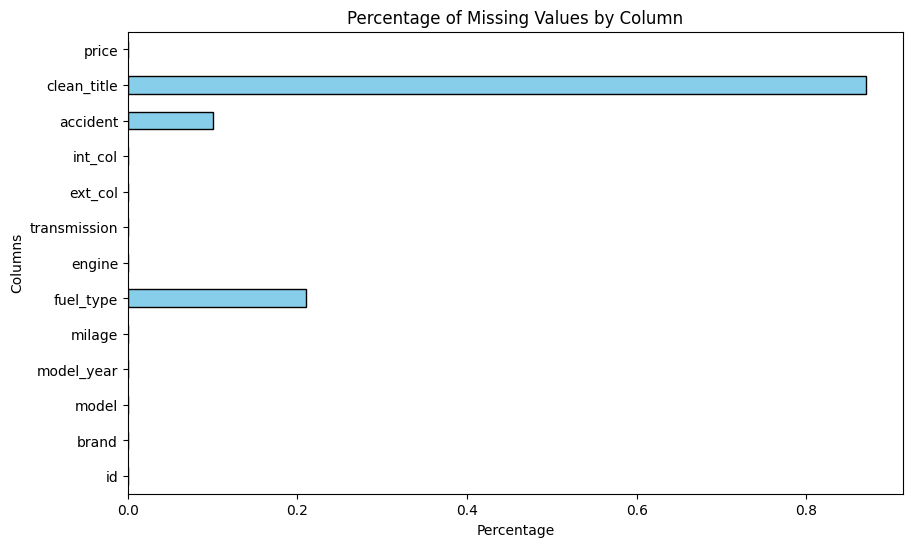

In [11]:
import matplotlib.pyplot as plt

missing_percentage.plot(kind='barh', figsize=(10, 6), color='skyblue', edgecolor="black", linewidth=1.0)

plt.title("Percentage of Missing Values by Column")
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.show()

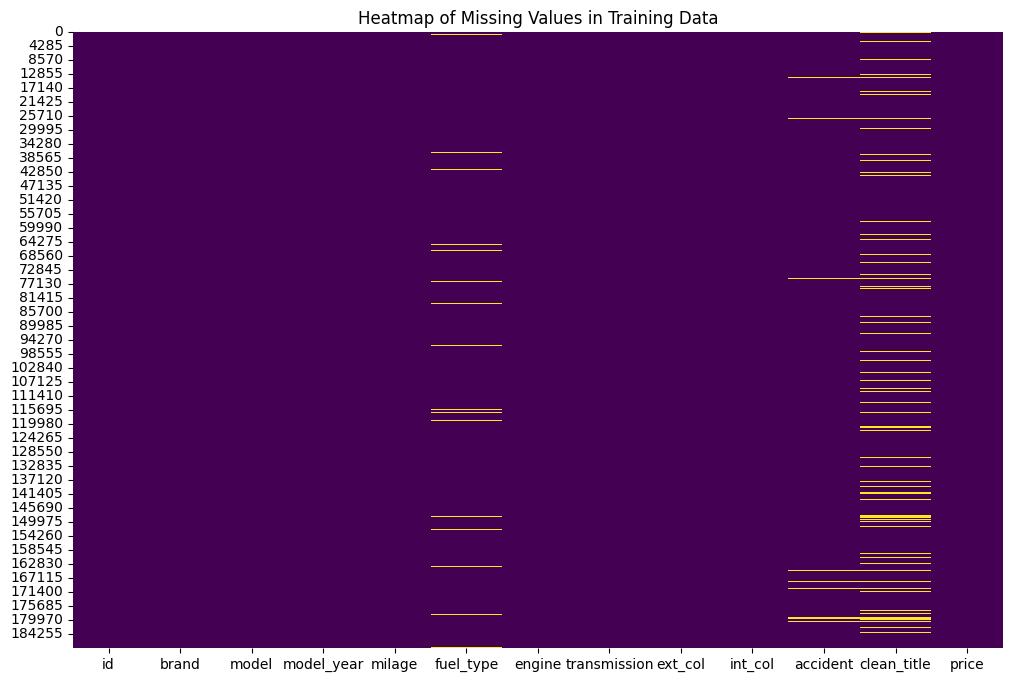

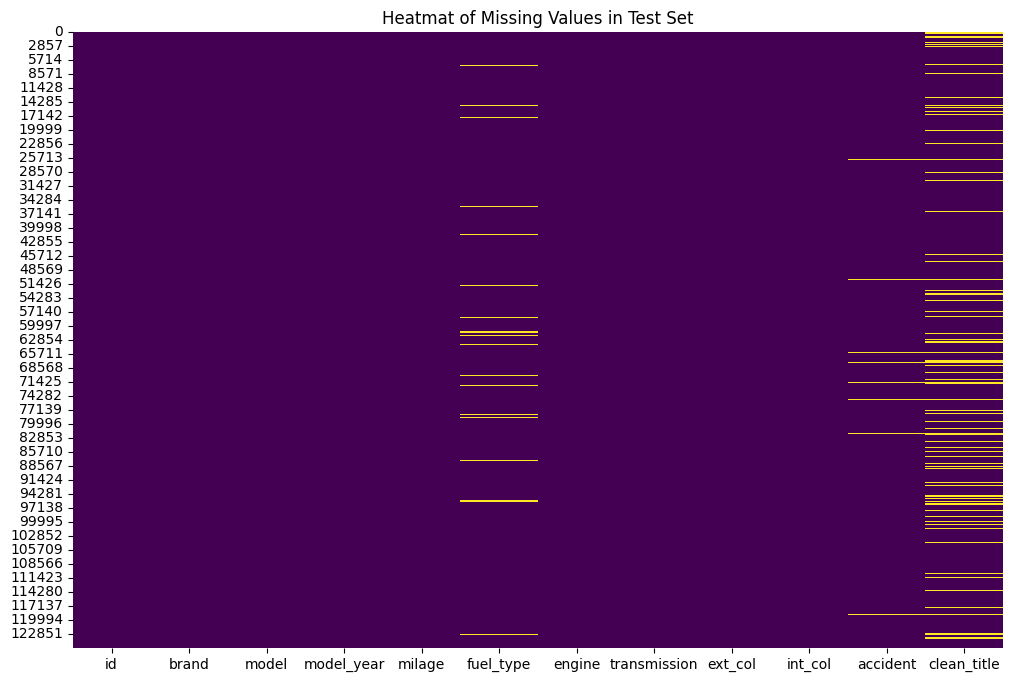

In [12]:
import seaborn as sns

# Create a heatmap for missing values
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull() , cbar=False , cmap="viridis")

plt.title("Heatmap of Missing Values in Training Data")
plt.show()

# Create a heatmap for missing values for test dataframe
plt.figure(figsize=(12,8))
sns.heatmap(df_test.isnull() , cbar=False , cmap="viridis")

plt.title("Heatmat of Missing Values in Test Set")
plt.show()

In [13]:
# Check for duplicate rows
duplicates = df.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

test_duplicates = df_test.duplicated()

print(f"Number of duplicate rows: {test_duplicates.sum()}")


Number of duplicate rows: 0
Number of duplicate rows: 0


In [14]:
df['brand'].value_counts()

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren            243
Aston              238
Satur

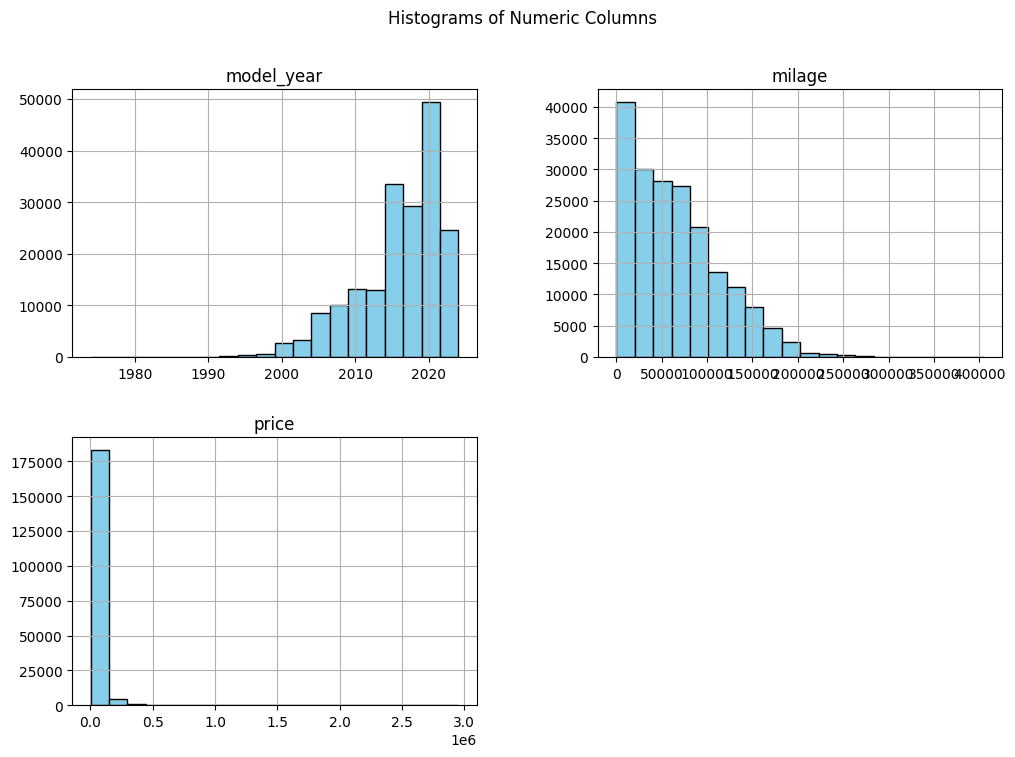

In [15]:
# Plot histograms for numeric columns
df[['model_year' , 'milage' , 'price']].hist(figsize=(12,8) , bins=20 , color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Columns")
plt.show()

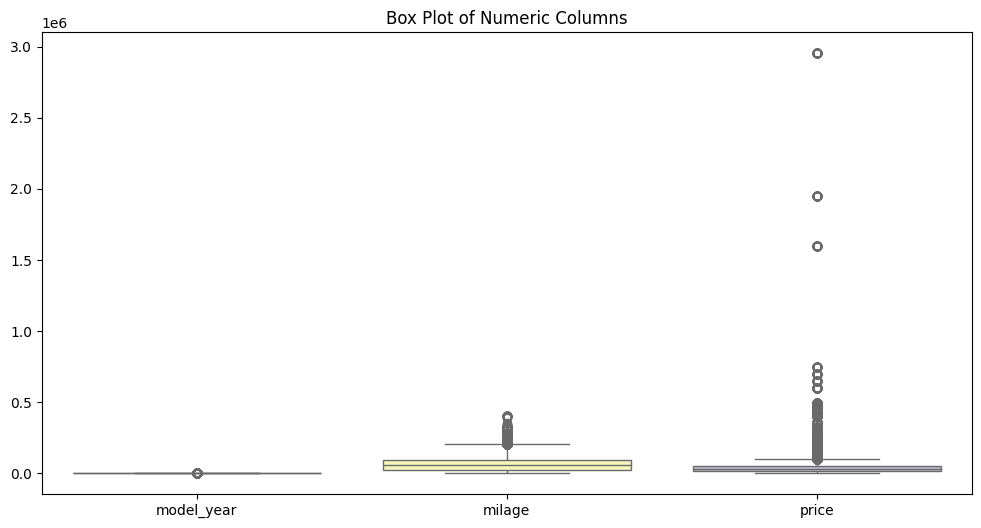

In [16]:
import seaborn as sns

# Create box plots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['model_year', 'milage', 'price']], palette="Set3")
plt.title('Box Plot of Numeric Columns')
plt.show()

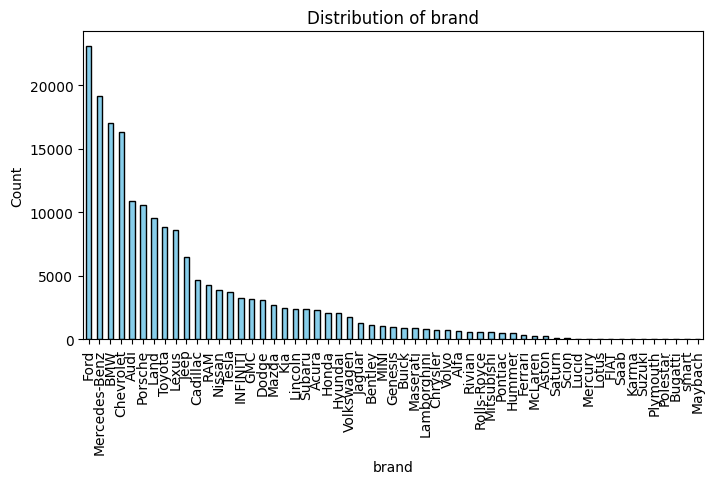

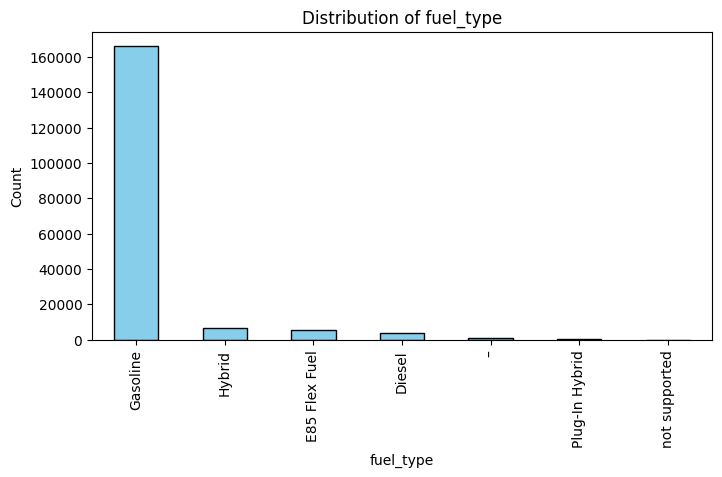

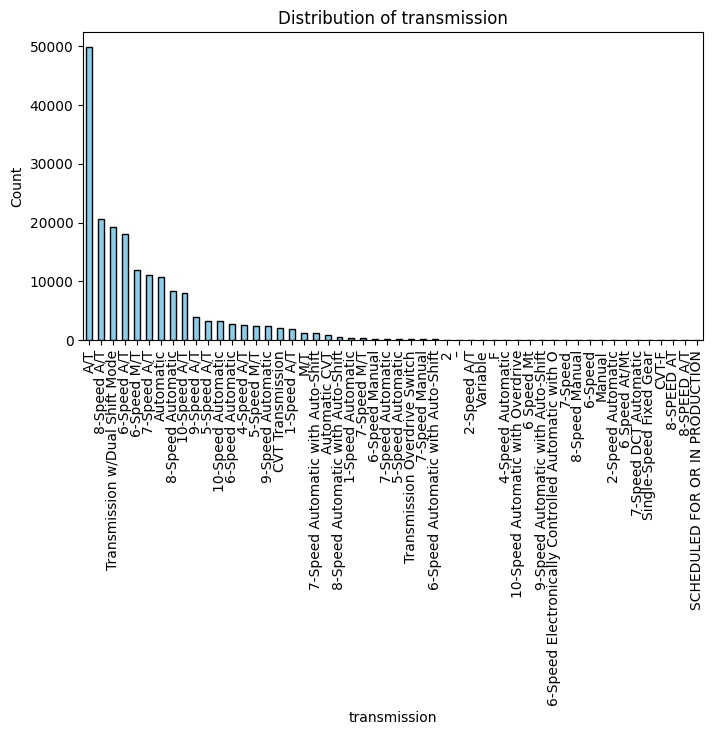

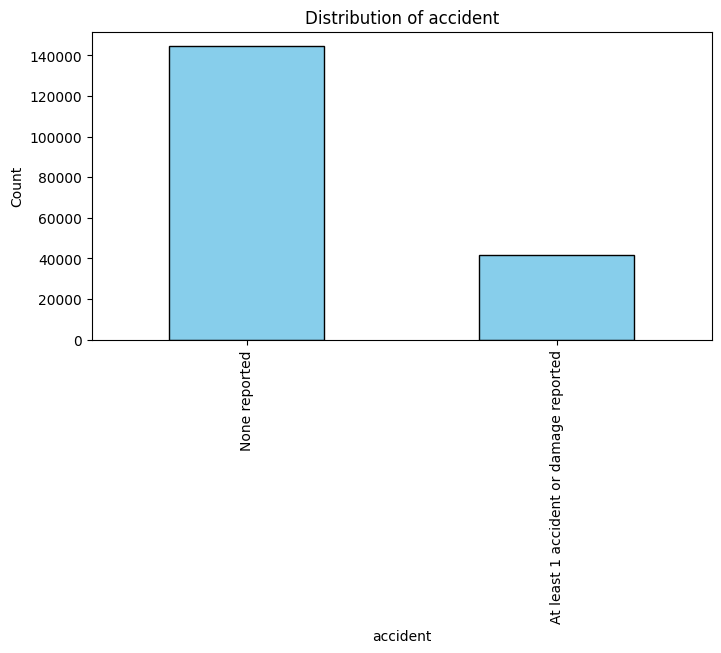

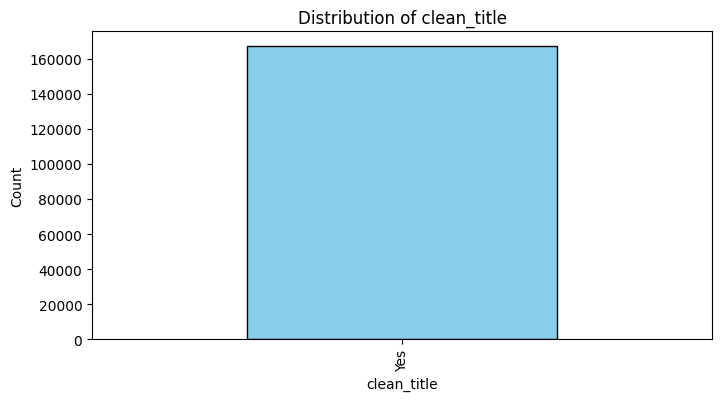

In [17]:
categorical_columns = ['brand', 'fuel_type', 'transmission', 'accident', 'clean_title']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

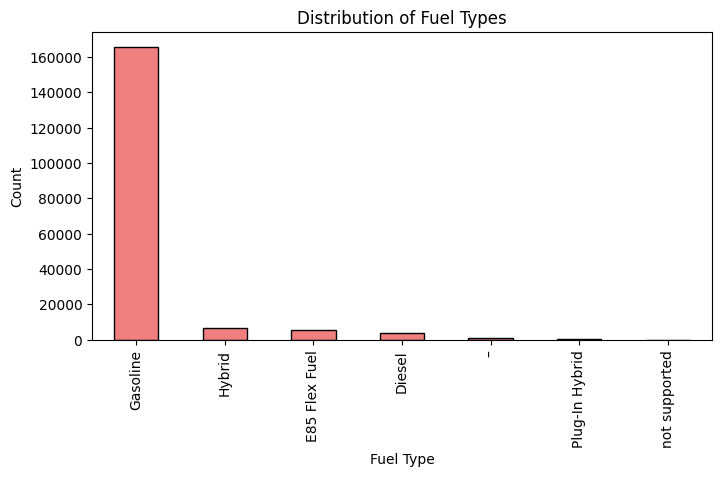

In [18]:
# Bar plot for fuel type
plt.figure(figsize=(8, 4))
df['fuel_type'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

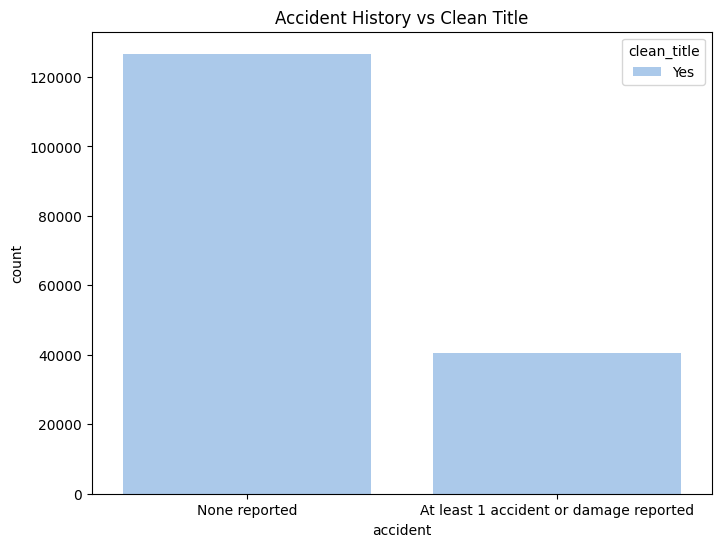

In [19]:
# Count plot for accident vs clean_title
plt.figure(figsize=(8, 6))
sns.countplot(x='accident', hue='clean_title', data=df, palette='pastel')
plt.title('Accident History vs Clean Title')
plt.show()

In [20]:
df.head(8)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
5,5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,Yes,29950
6,6,Audi,A8 L 3.0T,2016,62200,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,28500
7,7,Chevrolet,Silverado 1500 1LZ,2016,102604,E85 Flex Fuel,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,White,Gray,None reported,Yes,12500


In [21]:
df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

##

# Feature Engineering

In [22]:
import re

# Function to extract horsepower, engine size, and cylinder count
def extract_engine_info(engine_str):
    hp_match = re.search(r'(\d+\.?\d*)HP', engine_str)  # Extract HP
    engine_size_match = re.search(r'(\d+\.?\d*)L', engine_str)  # Extract engine size
    cylinders_match = re.search(r'(\d+)\sCylinder', engine_str)  # Extract cylinder count
    
    hp = float(hp_match.group(1)) if hp_match else None
    engine_size = float(engine_size_match.group(1)) if engine_size_match else None
    cylinders = int(cylinders_match.group(1)) if cylinders_match else None
    
    return hp, engine_size, cylinders

# Apply the function and create new columns
df[['hp', 'engine_size', 'cylinders']] = df['engine'].apply(lambda x: pd.Series(extract_engine_info(x)))
df_test[['hp', 'engine_size', 'cylinders']] = df['engine'].apply(lambda x: pd.Series(extract_engine_info(x)))

In [23]:
# Splitting model into main model and trim version
df[['model_main', 'model_trim']] = df['model'].str.split(' ', n=1, expand=True)
df_test[['model_main', 'model_trim']] = df['model'].str.split(' ', n=1, expand=True)

In [24]:
# Replace invalid or missing values with 'Unknown'
df['fuel_type'] = df['fuel_type'].replace(['–', 'not supported', np.nan], 'Unknown')
df_test['fuel_type'] = df['fuel_type'].replace(['–', 'not supported', np.nan], 'Unknown')

In [25]:
import numpy as np

# Set the threshold for the minimum frequency
threshold = 1000 

# Calculate the value counts for the 'brand' column
brand_counts = df['brand'].value_counts()
test_brand_counts = df_test['brand'].value_counts()
# Identify rare brands that have a count less than the threshold
rare_brands = brand_counts[brand_counts < threshold].index
test_rare_brands = test_brand_counts[test_brand_counts < threshold].index
# Replace rare brands with 'Other' using numpy's vectorized operation
df['brand'] = np.where(df['brand'].isin(rare_brands), 'Other', df['brand'])
df_test['brand'] = np.where(df_test['brand'].isin(test_rare_brands), 'Other', df_test['brand'])
# Check the distribution of the updated 'brand' column
print(df['brand'].value_counts())
print(df_test['brand'].value_counts())

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Other             9953
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Name: count, dtype: int64
brand
Ford             15265
Mercedes-Benz    12875
BMW              11286
Chevrolet        10698
Other             9153
Audi              7289
Porsche           7153
Land              6348
Toyota            6084
Lexus             5729
Jeep              4412
Cadillac          3059
RAM               2

In [26]:
# Replace similar transmission types with standardized values
df['transmission'] = df['transmission'].replace({
    'A/T': 'Automatic', 
    'Automatic CVT': 'Automatic', 
    'CVT Transmission': 'CVT', 
    'M/T': 'Manual',
    '6 Speed At/Mt': 'Automatic',
    'SCHEDULED FOR OR IN PRODUCTION': np.nan  # Remove irrelevant rows
})

# Handle other odd cases, and fill missing or invalid values with 'Unknown'
df['transmission'] = df['transmission'].replace(['–', '2', np.nan], 'Unknown')


# Replace similar transmission types with standardized values
df_test['transmission'] = df_test['transmission'].replace({
    'A/T': 'Automatic', 
    'Automatic CVT': 'Automatic', 
    'CVT Transmission': 'CVT', 
    'M/T': 'Manual',
    '6 Speed At/Mt': 'Automatic',
    'SCHEDULED FOR OR IN PRODUCTION': np.nan  # Remove irrelevant rows
})

# Handle other odd cases, and fill missing or invalid values with 'Unknown'
df_test['transmission'] = df_test['transmission'].replace(['–', '2', np.nan], 'Unknown')

In [27]:
df.head(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,engine_size,cylinders,model_main,model_trim
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,Automatic,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0,Cooper,S Base
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,Automatic,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0,LS,V8
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,Automatic,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0,Silverado,2500 LT
3,3,Other,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8.0,G90,5.0 Ultimate
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4.0,Metris,Base
5,5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Automatic,White,–,None reported,Yes,29950,252.0,2.0,4.0,A6,2.0T Sport
6,6,Audi,A8 L 3.0T,2016,62200,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,28500,333.0,3.0,6.0,A8,L 3.0T
7,7,Chevrolet,Silverado 1500 1LZ,2016,102604,E85 Flex Fuel,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,Automatic,White,Gray,None reported,Yes,12500,355.0,5.3,8.0,Silverado,1500 1LZ
8,8,Ford,F-150 XLT,2020,38352,Gasoline,2.7L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Snowflake White Pearl Metallic,Black,None reported,Yes,62890,NaN,2.7,NaN,F-150,XLT
9,9,BMW,M4 Base,2015,74850,Gasoline,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Black,Blue,None reported,Yes,4000,425.0,3.0,6.0,M4,Base


In [29]:
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,hp,engine_size,cylinders,model_main,model_trim
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes,172.0,1.6,4.0,Cooper,S Base
1,188534,Land,Rover Defender SE,2020,9142,Gasoline,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes,252.0,3.9,8.0,LS,V8
2,188535,Ford,Expedition Limited,2022,28121,E85 Flex Fuel,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN,320.0,5.3,8.0,Silverado,2500 LT
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN,420.0,5.0,8.0,G90,5.0 Ultimate
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Automatic,Gray,Black,None reported,Yes,208.0,2.0,4.0,Metris,Base


In [30]:
df['cylinders'].unique()

array([ 4.,  8.,  6., nan, 10., 12.,  5.,  3.])

In [32]:
df_final = df.drop(['id', 'clean_title', 'model', 'engine', 'ext_col', 'int_col', 'model_trim'], axis=1)
df_test = df_test.drop(['id', 'clean_title', 'model', 'engine', 'ext_col', 'int_col', 'model_trim'], axis=1)

KeyError: "['id', 'clean_title', 'model', 'engine', 'ext_col', 'int_col', 'model_trim'] not found in axis"